# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студент гр. 1381 Возмитель Влас Евгеньевич и Тарасов Константин Олегович. Вариант №3.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Формула дискретного сигнала: $$s(t)=\sum_{k=0}^{k=10}A_k cos(\omega_k t + \phi_k)$$

Формула для ДПФ: $$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

Для сглаживания по 5 и 9 точкам используются следующие формулы:  
$$ H(\omega) = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2}) $$

$$ H(\omega) = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2} + s_{n+3} + s_{n+4}) $$

Сглаживание полиномом второй степени выполняется по формулам по 5 и 9 точкам соответственно:

$$y_n=\frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$

$$y_n=\frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$

Сглаживание полиномом четвертой степени выполняется по формулам по 7 и 11 точкам соответственно:

$$y_n=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+75x_{n+1}-30x_{n+2}+5x_{n+3})$$

По 11 точкам: $$y_n=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5})$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

    Формула дискретного сигнала: $$s(t)=\sum_{k=0}^{k=10}A_k cos(\omega_k t + \phi_k)$$

    Случайным образом были сгенерированы $A_k$ и $\varphi_k$
    
    Для амлитуд $A_k$ была выполнена нормализация ($A_k= \frac{A_k}{\sum_{i=0}^{10} A_i}$)


In [2]:
import numpy as np

# Генерация частотных компонент
omega = np.linspace(0, np.pi, num=11)

# Генерация амплитуд случайным образом
amplitudes = np.random.randint(1, 10, size=len(omega))
print("Амплитуды до нормализации:", amplitudes)

# Нормализация амплитуд
normal_amplitudes = amplitudes / np.sum(amplitudes)
print("\nНормализованные амплитуды:", normal_amplitudes)

# Генерация фазовых сдвигов
phase_shifts = np.random.uniform(low=0, high=np.pi/2, size=len(omega))
print("\nФазовые сдвиги:", phase_shifts)

Амплитуды до нормализации: [8 4 7 3 7 6 5 2 7 1 8]

Нормализованные амплитуды: [0.13793103 0.06896552 0.12068966 0.05172414 0.12068966 0.10344828
 0.0862069  0.03448276 0.12068966 0.01724138 0.13793103]

Фазовые сдвиги: [0.89036753 0.15700492 0.53269049 1.33786983 0.76779209 0.62915403
 0.18527234 1.3751835  1.36813784 0.29547476 0.16050036]


2. Визуализировать исходные аналоговый и дискретизированный сигналы.

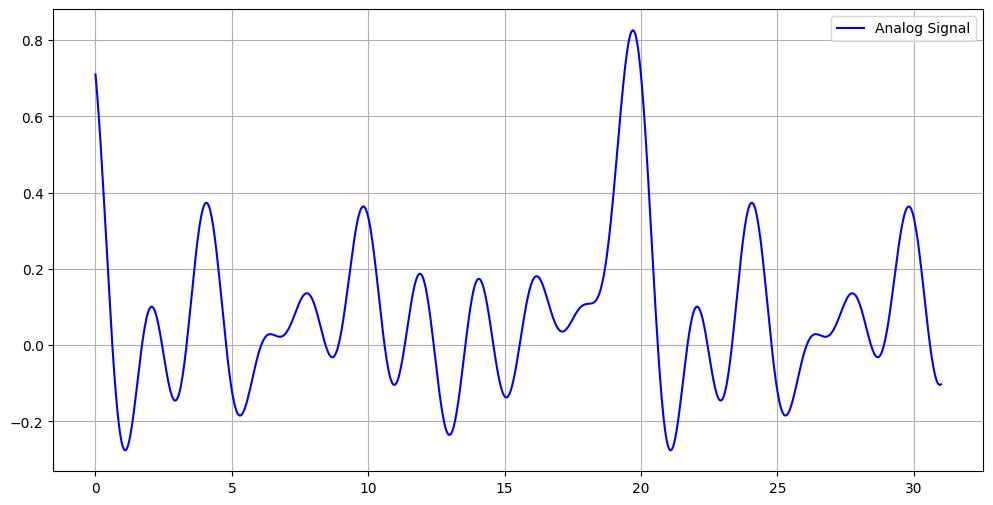

In [3]:
#Аналоговый сигнад
import numpy as np
import matplotlib.pyplot as plt

def signalValue(k):
    total_sum = 0
    for i in range(len(normal_amplitudes)):
        total_sum += normal_amplitudes[i] * np.cos(omega[i] * k + phase_shifts[i])
    return total_sum

time_axis = np.linspace(0, 31, 1000)
signal_values = [signalValue(t) for t in time_axis]

plt.figure(figsize=(12, 6))
plt.plot(time_axis, signal_values, label='Analog Signal', color="blue")
plt.grid(True)
plt.legend()
plt.show()

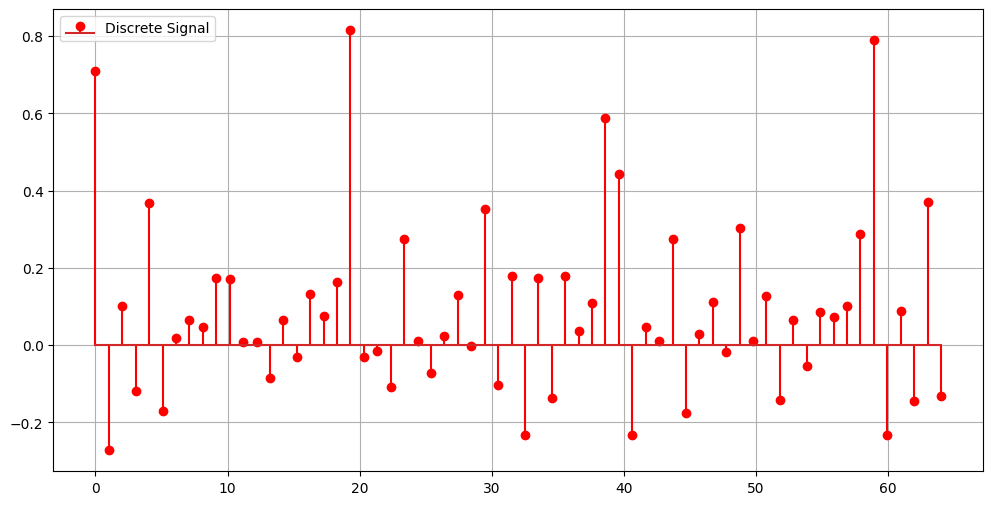

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
num_stems = 64
num_points = 2000

x_values = []
y_values = []
n = 63
start = 0
end = 64
for i in range(n + 1):
    x_val = start + i / (n - 1) * (end - start)
    y_values.append(signalValue(x_val))
    x_values.append(x_val)

plt.grid(True)
plt.stem(
    np.linspace(start, end, num=num_stems),
    y_values,
    linefmt='red',
    markerfmt='red',
    label='Discrete Signal'
)
plt.legend()

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
$$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

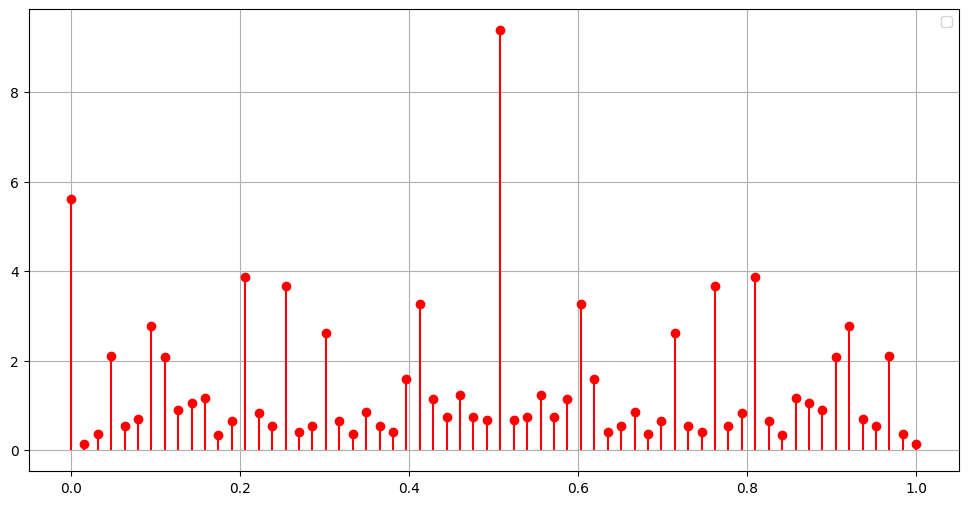

In [5]:
from math import pi
plt.figure(figsize=(12, 6))
def dpf(signal, n):
    X = 0
    for k in range(len(signal)):
        X += signal[k] * np.exp(-2j * pi * k * n / len(signal))

    return X

signal_data = [signalValue(k) for k in range(64)]

dpf_values = []
for i in range(len(signal_data)):
    dpf_values.append(abs(dpf(signal_data, i)))

plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
)
plt.legend()

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

    Уже известные нам формулы для линейного сглаживания:

    - По 5ти: $ H(\omega) = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2}) $

    - По 9ти: $ H(\omega) = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2} + s_{n+3} + s_{n+4}) $

    В результате получим:

    $$H_{5}(f) = \frac{sin(5\pi f)}{5sin(\pi f)}, H_{9}(f) = \frac{sin(9\pi f)}{9sin(\pi f)}$$

    Для упрощения применения фильтра будет использоваться функция библиотеки Numpy:

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

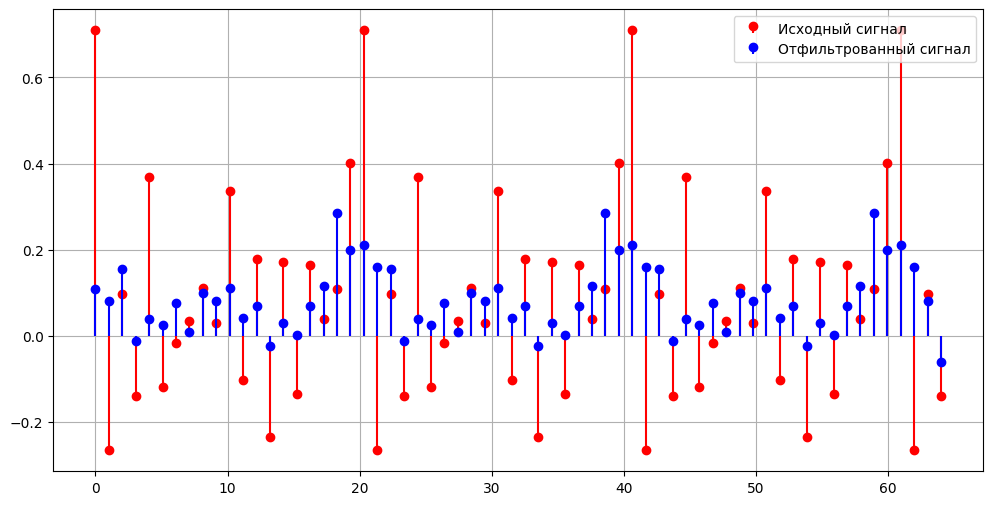

In [6]:
lin_5 = np.convolve(signal_data, np.ones(5) / 5, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    signal_data,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    lin_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

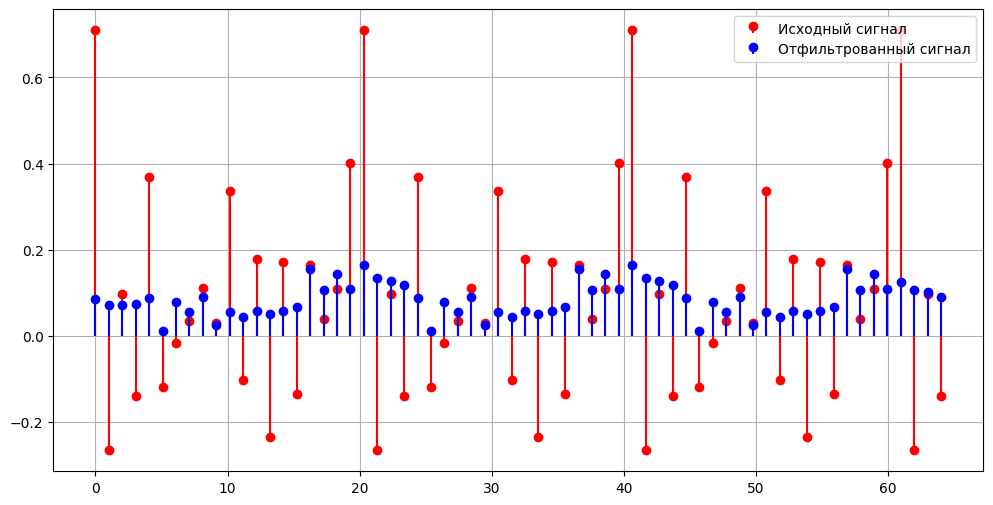

In [7]:
lin_9 = np.convolve(signal_data, np.ones(9) / 9, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    signal_data,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    lin_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

## Выводы


6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

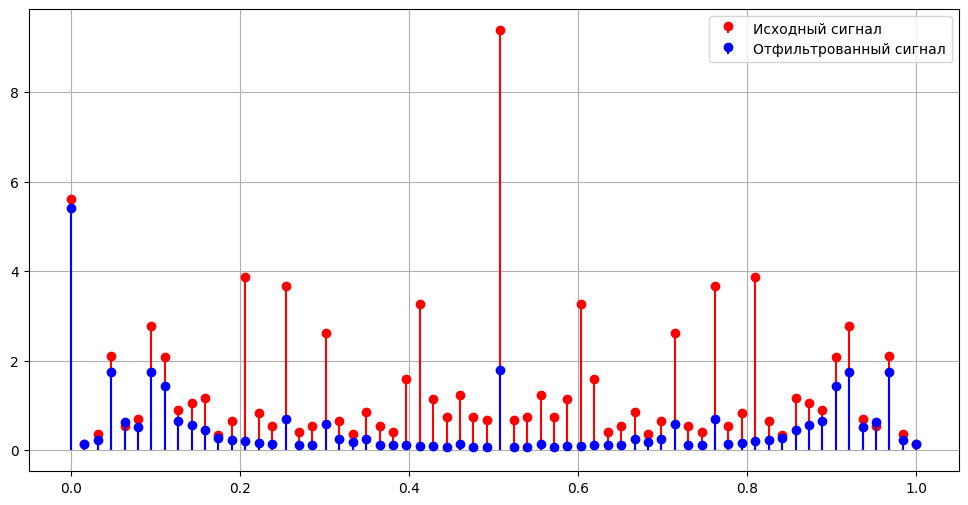

In [8]:
dpf_lin_5 = []
for i in range(len(signal_data)):
    dpf_lin_5.append(abs(dpf(lin_5, i)))

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_lin_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

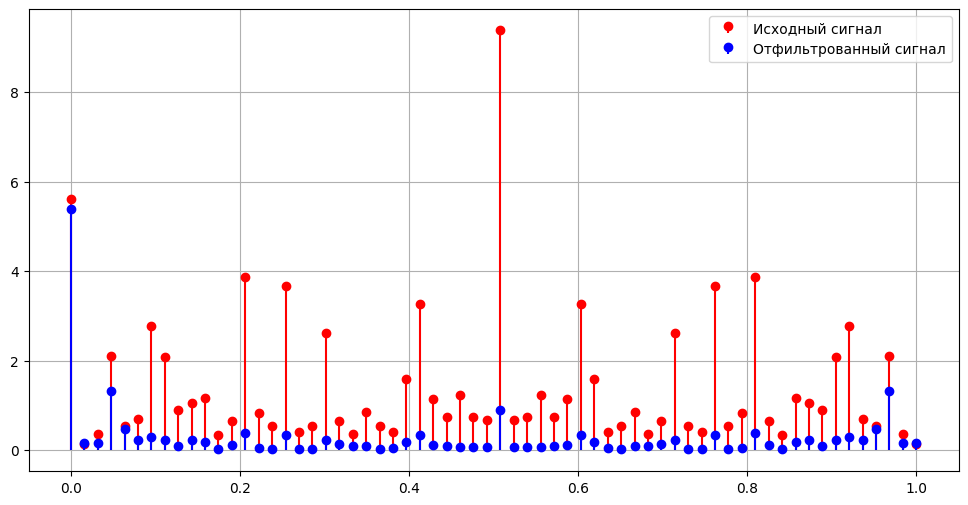

In [9]:
dpf_lin_9 = []
for i in range(len(signal_data)):
    dpf_lin_9.append(abs(dpf(lin_9, i)))

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_lin_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

7. Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

- С увеличением частоты сигнал подвергается более сильному ослаблению.

- Больший фильтр усредняет больше значений.

8. Повторить п. 4–7 для следующих фильтров:

  - Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

      Формула по 5 точкам:

  $ y_n=\frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2}) $

      Формула по 9 точкам:

  $ y_n=\frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4}) $

      Передаточные функции:

  $ H_5(\omega)=\frac{1}{35}(17+24\cos(\omega)-6\cos(2\omega)) $

  $ H_9(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega)) $

<StemContainer object of 3 artists>

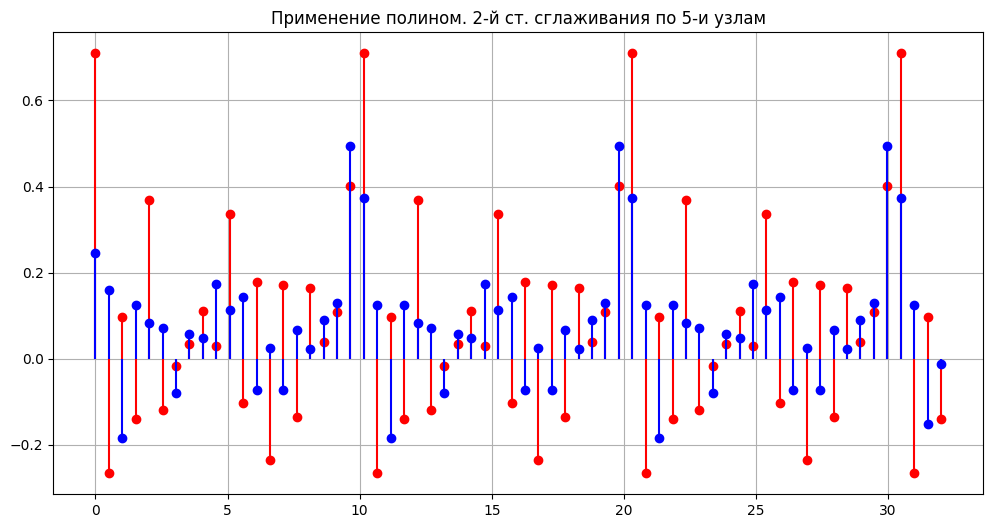

In [19]:
x_5 = np.convolve(signal_data, np.array([-3, 12, 17, 12, -3]) / 35, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 32, num=num_stems),
 x_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

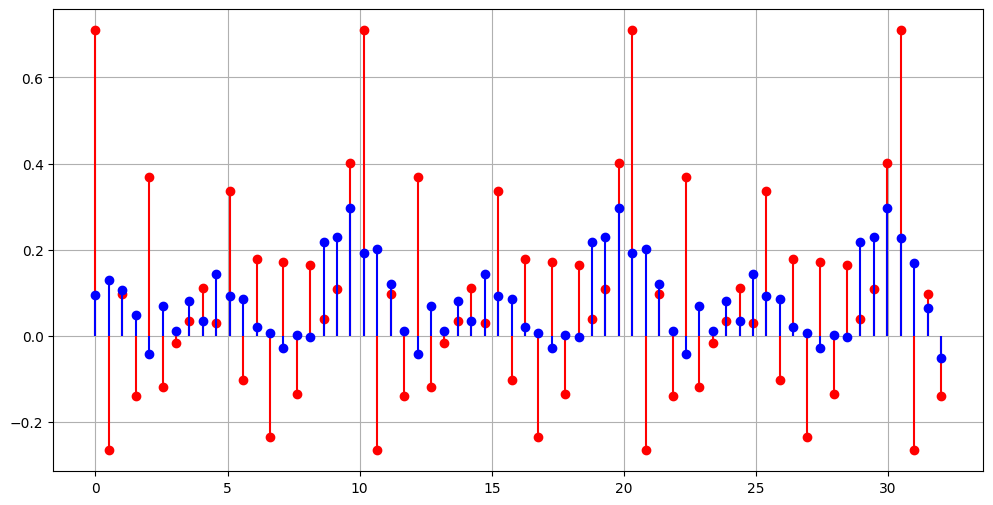

In [25]:
x_9 = np.convolve(signal_data,np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(
    np.linspace(0, 32, num=num_stems),
    x_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

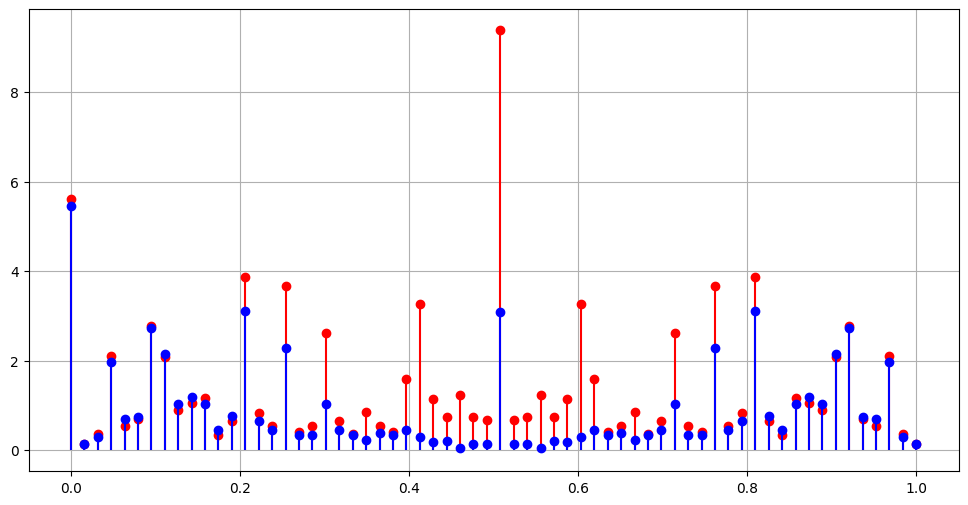

In [26]:
dpf_5 = []
for i in range(len(signal_data)):
    dpf_5.append(abs(dpf(x_5, i)))


plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
 dpf_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

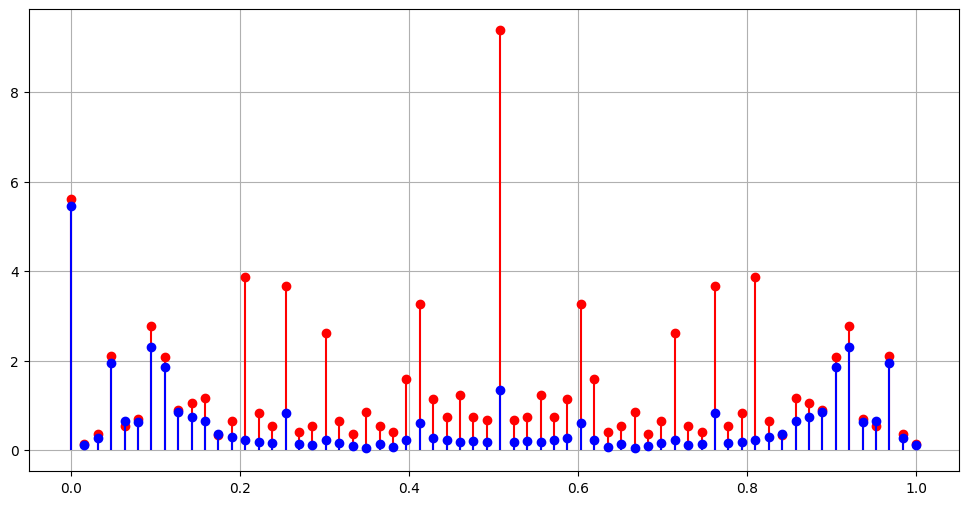

In [27]:
dpf_9 = []
for i in range(len(signal_data)):
    dpf_9.append(abs(dpf(x_9, i)))


plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
 dpf_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

   - Сглаживание полиномом 4-ой степени по 7 и 11 узлам

Формула по 7 точкам: $$y_n=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+75x_{n+1}-30x_{n+2}+5x_{n+3})$$

Формула по 11 точкам: $$y_n=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5})$$

Передаточные функции: $$H_7(\omega)=\frac{1}{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$

$$H_{11}(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$

<StemContainer object of 3 artists>

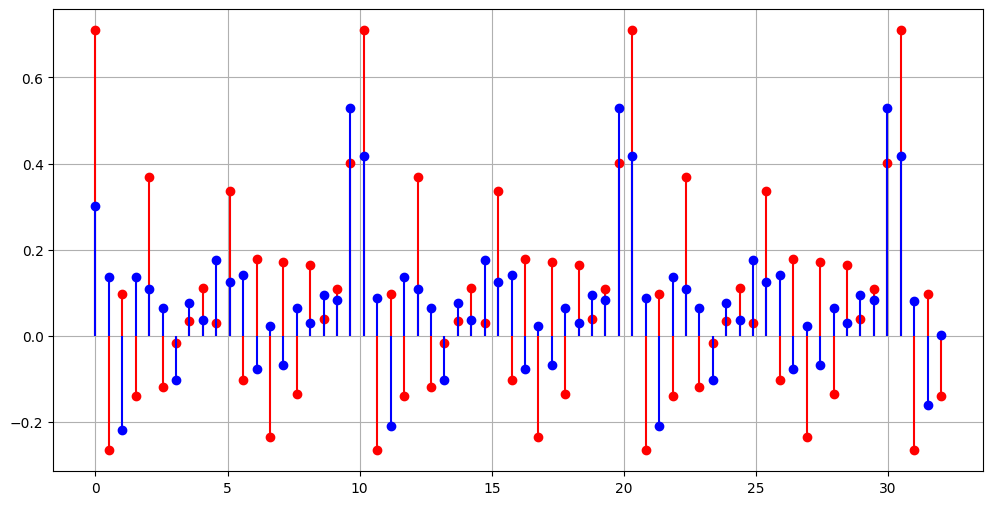

In [28]:
x_7 = np.convolve(signal_data, np.array([5, -30, 75, 131, 75, -30, 5]) / 231, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 32, num=num_stems),
 x_7,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

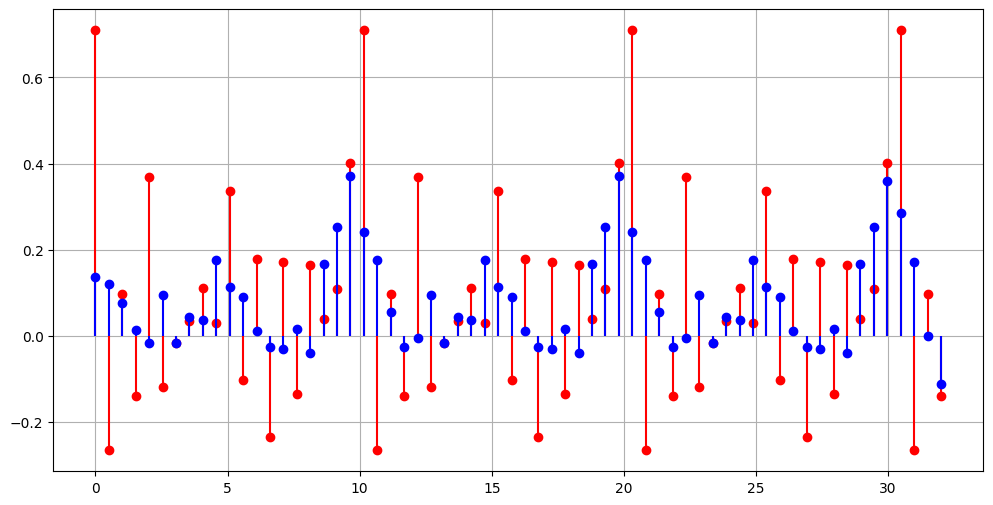

In [29]:
x_11 = np.convolve(signal_data, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]) / 429, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(
    np.linspace(0, 32, num=num_stems),
    x_11,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

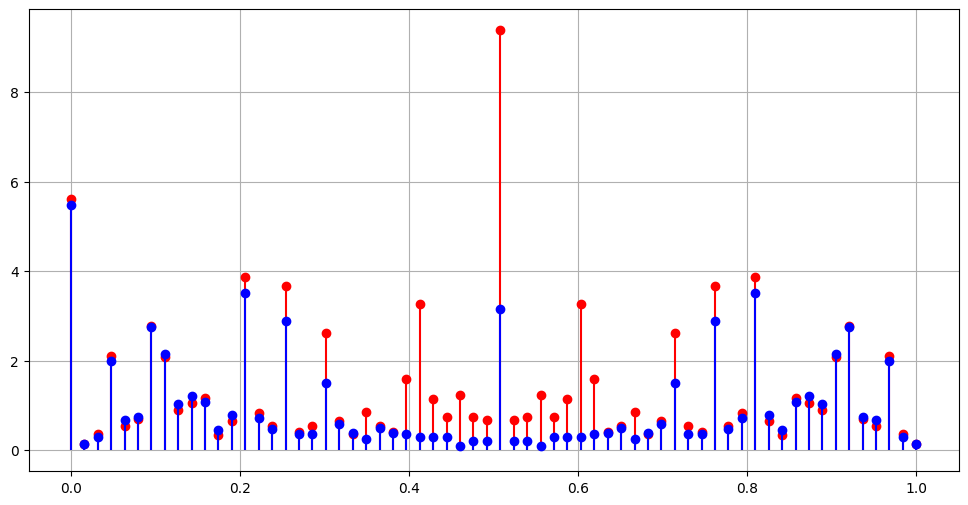

In [30]:
dpf_7 = []
for i in range(len(signal_data)):
    dpf_7.append(abs(dpf(x_7, i)))


plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
 dpf_7,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

<StemContainer object of 3 artists>

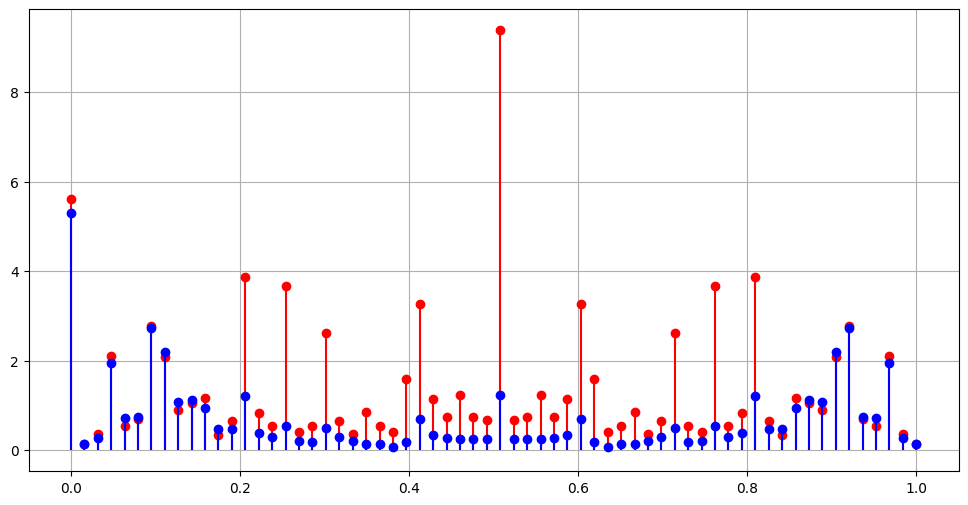

In [31]:
dpf_11 = []
for i in range(len(signal_data)):
    dpf_11.append(abs(dpf(x_11, i)))


plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
 dpf_11,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

- Все используемые фильтры работают в соответствии с их теоретическими передаточными функциями.
- Фильтры с большим количеством точек обеспечивают более сильное сглаживание, но могут терять больше деталей на высоких частотах.
- Полиномы высших степеней позволяют сохранить больше информации на средних частотах, предоставляя более гибкие возможности для обработки сигналов.

## Выводы

В ходе выполнения работы были получены практические навыки выполнения фильрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье.